
# A Statistical Analysis & ML workflow of Titanic
There are three primary goals of this kernel.

Do a statistical analysis of how some group of people was survived more than others.
Do an exploratory data analysis(EDA) of titanic with visualizations and storytelling.
Predict: Use machine learning classification models to predict the chances of passengers survival.

## Importing Libraries

In [201]:
#! pip install xgboost

In [202]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

from sklearn import metrics
from sklearn.metrics import roc_auc_score

## Data loading

In [203]:
df_train = pd.read_csv(r'C:\Users\ekrsinh\OneDrive - Ericsson\Documents\Modelling_other\A Statistical Analysis & ML workflow of Titanic\train.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Exploratory data Analysis

In [204]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Missing value treatment

In [205]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [206]:
(df_train.isnull().sum()/len(df_train.index)).round(2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age            20.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [207]:
#repalnce missing age with mean value
df_train['Age'] = df_train['Age'].fillna(df_train['Age'].mean())

In [208]:
(df_train.isnull().sum()/len(df_train.index)).round(2)*100

PassengerId     0.0
Survived        0.0
Pclass          0.0
Name            0.0
Sex             0.0
Age             0.0
SibSp           0.0
Parch           0.0
Ticket          0.0
Fare            0.0
Cabin          77.0
Embarked        0.0
dtype: float64

In [209]:
# Dropping Cabin column as there are 77% data missing
df_train = df_train.drop('Cabin',axis =1)

In [210]:
(df_train.isnull().sum()/len(df_train.index)).round(2)*100

PassengerId    0.0
Survived       0.0
Pclass         0.0
Name           0.0
Sex            0.0
Age            0.0
SibSp          0.0
Parch          0.0
Ticket         0.0
Fare           0.0
Embarked       0.0
dtype: float64

Now there are no missing values

In [211]:
df_train['Survived'].value_counts() # Target variable

0    549
1    342
Name: Survived, dtype: int64

Data is almost balanced

In [212]:
df_train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.033207,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500
Age,0.033207,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566
SibSp,-0.057527,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000


<AxesSubplot:xlabel='Survived', ylabel='Age'>

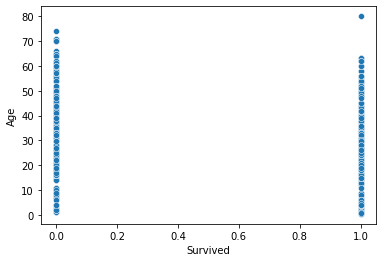

In [213]:
sns.scatterplot(df_train['Survived'] ,df_train['Age'] )

<AxesSubplot:xlabel='Age'>

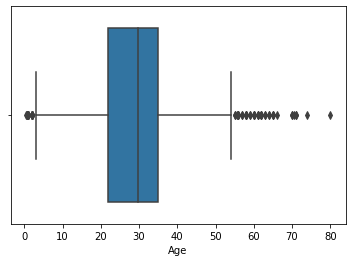

In [214]:
sns.boxplot(df_train['Age'])

We can see there Age is not the cause for survival as people survived and not survived belong to nearly ame age group.However, age group here is 20 to 50 years as concluded from below grap.

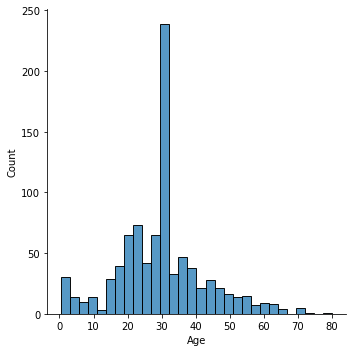

In [215]:
#Checking age distribution
sns.displot(df_train['Age'])

Age group mostly between 20 to 50 years

In [216]:
#Checking class distribution
(df_train['Pclass'].value_counts(normalize=True)*100).round(2)

3    55.11
1    24.24
2    20.65
Name: Pclass, dtype: float64

### Pclass and Survived comparison

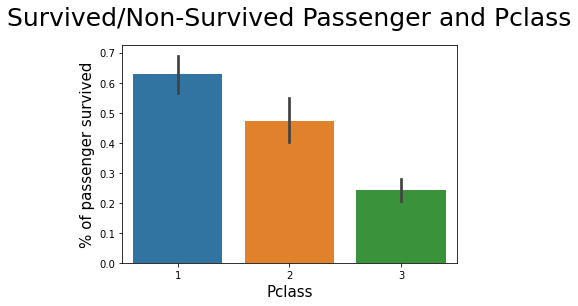

In [217]:
sns.barplot(df_train['Pclass'],df_train['Survived']);
plt.title("Survived/Non-Survived Passenger and Pclass", fontsize = 25,loc = 'center', pad = 20)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Pclass",fontsize = 15);

### Conclusion : Pclass belonging to 1 survived( apprx. 60%) more than Pclass 2 (around 48 %) followed by Pclass 3 ( approx. 25 %)

In [218]:
df_train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

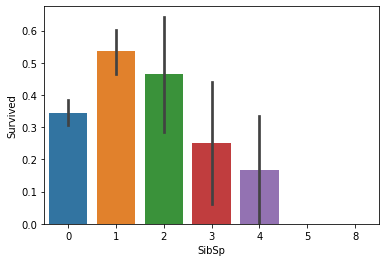

In [219]:
sns.barplot(df_train['SibSp'],df_train['Survived']);

### Conclusion : SibSp belonging to 1 & 2 survived more than others

### Fare and Survived comparison

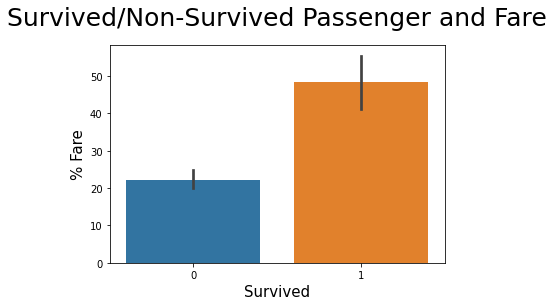

In [220]:
sns.barplot(df_train['Survived'],df_train['Fare']);
plt.title("Survived/Non-Survived Passenger and Fare", fontsize = 25,loc = 'center', pad = 20)
plt.ylabel("% Fare", fontsize = 15)
plt.xlabel("Survived",fontsize = 15);

People who paid higher fare , more likely to servived !

<AxesSubplot:xlabel='Fare', ylabel='Density'>

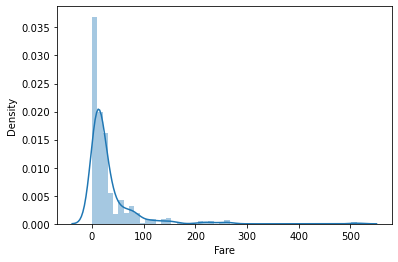

In [221]:
sns.distplot(df_train['Fare'])

### Correlation check

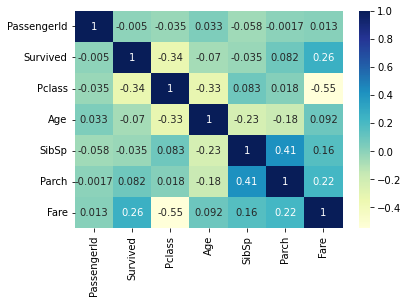

In [222]:
sns.heatmap(df_train.corr(),annot = True,cmap="YlGnBu");

In [223]:
df_train.corr()['Survived']*100

PassengerId     -0.500666
Survived       100.000000
Pclass         -33.848104
Age             -6.980852
SibSp           -3.532250
Parch            8.162941
Fare            25.730652
Name: Survived, dtype: float64

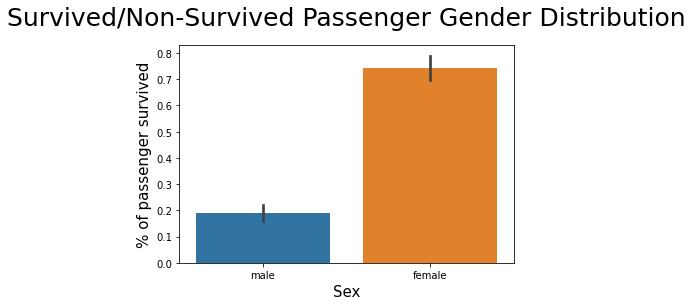

In [224]:
sns.barplot(df_train['Sex'],df_train['Survived']);
plt.title("Survived/Non-Survived Passenger Gender Distribution", fontsize = 25,loc = 'center', pad = 20)
plt.ylabel("% of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);

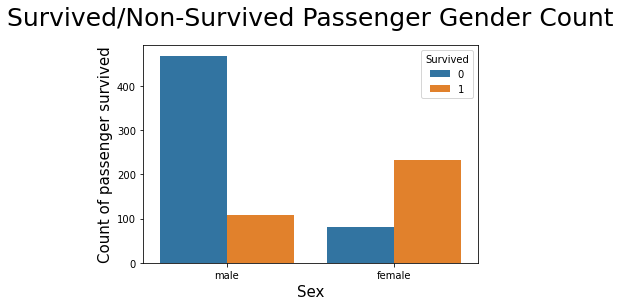

In [225]:
sns.countplot(x = "Sex", hue="Survived",data = df_train, linewidth=4);
plt.title("Survived/Non-Survived Passenger Gender Count", fontsize = 25,loc = 'center', pad = 20)
plt.ylabel("Count of passenger survived", fontsize = 15)
plt.xlabel("Sex",fontsize = 15);

#### Above plot shows that among all female, approx. 200 survived and around 80 did nt survive.And among Men, around 480 survived and approx. 100 did not survived.

In [226]:
df_train['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [227]:
df_train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## Statistical overview

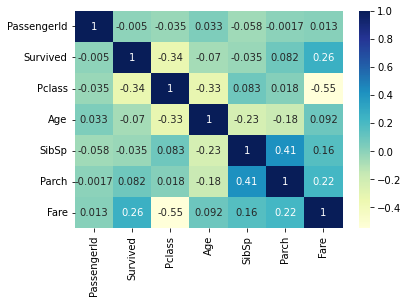

In [228]:
# Heatmap
sns.heatmap(df_train.corr(),annot = True,cmap="YlGnBu");

In [229]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [230]:
# Overview(Survived vs non survied)
survived_summary = df_train.groupby("Survived")
survived_summary.mean().reset_index()

,Survived,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,0,447.016393,2.531876,30.415100,0.553734,0.329690,22.117887
1,1,444.368421,1.950292,28.549778,0.473684,0.464912,48.395408


Here also, we can see that:
    1. Survival ratio is not dependent on age
    2. People paid higher fare, survived 

In [231]:
# Overview(Survived vs non survied)
survived_summary = df_train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [232]:
# Overview(Survived vs non survied)
survived_summary = df_train.groupby("Pclass")
survived_summary.mean().reset_index()

,Pclass,PassengerId,Survived,Age,SibSp,Parch,Fare
0,1,461.597222,0.629630,37.048118,0.416667,0.356481,84.154687
1,2,445.956522,0.472826,29.866958,0.402174,0.380435,20.662183
2,3,439.154786,0.242363,26.403259,0.615071,0.393075,13.675550


#### Observation from statistical analysis
1. This train data set has 891 raw and 9 columns.
2. only 38% passenger survived during that tragedy.
3. ~74% female passenger survived, while only ~19% male passenger survived.
4. ~63% first class passengers survived, while only 24% lower class passenger survived.

# Observation summary of correlations

So, Let's analyze these correlations a bit. We have found some moderately strong relationships between different features. There is a definite positive correlation between Fare and Survived rated. This relationship reveals that the passenger who paid more money for their ticket were more likely to survive. This theory aligns with one other correlation which is the correlation between Fare and Pclass(-0.6). This relationship can be explained by saying that first class passenger(1) paid more for fare then second class passenger(2), similarly second class passenger paid more than the third class passenger(3). This theory can also be supported by mentioning another Pclass correlation with our dependent variable, Survived. The correlation between Pclass and Survived is -0.33. This can also be explained by saying that first class passenger had a better chance of surviving than the second or the third and so on.

However, the most significant correlation with our dependent variable is the Sex variable, which is the info on whether the passenger was male or female. This negative correlation with a magnitude of -0.54 which points towards some undeniable insights. Let's do some statistics to see how statistically significant this correlation is.

# Statistical Test for Correlation

Lets try to understand scietifically / mathematically that how significant these results are.

In [233]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [234]:
# Overview(Survived vs non survied)
survived_summary = df_train.groupby("Sex")
survived_summary.mean().reset_index()

,Sex,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,female,431.028662,0.742038,2.159236,28.216730,0.694268,0.649682,44.479818
1,male,454.147314,0.188908,2.389948,30.505824,0.429809,0.235702,25.523893


In [235]:
men_survival_mean = 0.189
female_survival_mean = 0.74
print('Difference between sample means of men and female :',female_survival_mean - men_survival_mean)

Difference between sample means of men and female : 0.5509999999999999


Note : These two means are not population mean.So, we will be doing sample test where we will do taking multiple random samples and take the mean for each of them.These ditribution of samples will look like normal distribution/t distribution as per central limit theorem.
We will take 50 random samples form each group and conpute their mean.

In [236]:
# separating male and female dataframe.
import random
male = df_train[df_train['Sex'] == 'male']
female = df_train[df_train['Sex'] == 'female']

m_mean_sample = []
f_mean_sample = []

In [237]:
for i in range(50):
    m_mean_sample.append(np.mean(random.sample(list(male['Survived']), k =50))) # taking 50 random sample of male
    f_mean_sample.append(np.mean(random.sample(list(female['Survived']), k =50))) # taking 50 random sample of female
    
print("Sample mean of Men",round(np.mean(m_mean_sample),2))
print("Sample mean of Female",round(np.mean(f_mean_sample),2)) 
print('Difference of Men and Female mean', round(np.mean(f_mean_sample),2)- round(np.mean(m_mean_sample),2))


Sample mean of Men 0.21
Sample mean of Female 0.72
Difference of Men and Female mean 0.51


Above statistsics is our evidence. We find these means by randomly selecting 50 men and 50 female from sample which is selected from broader population.To confirm that these values are stattistically correct or we are confident about these values, we will prerform t test(since we have less sample count and we do not know population standard deviation). We will perform tw sample t- tst as we have two samples ( men and female).

#### Above statistsics is our evidence. 

#### Formation of hypothesis

Null hypothesis , Ho :There is no difference between survival rate of male and female passengers. or mean difference between male nad female passenger is zero
Alternate hypothesis , H1 : There is difference between survival rate of male and female passengers or mean difference between survival rate of male and female passengers is not zero.

With above hypotheses , we will have to go for 2 tailed t test .We can also go with one tailed t-test , if we formulate our hypothesis as follows :

Null hypothesis , Ho : male mean is greater than or equal to female mean.
Alternate hypothesis , H1 : male mean is less than female mean.

### significance level

Lets assume significance level of 0.05. So, our confidence interval will be 95 %.

In [238]:
### Putting mean samples in dataframe to perform t-est with excel

In [239]:
mean_sample = pd.DataFrame(m_mean_sample,f_mean_sample)
mean_sample = mean_sample.reset_index()
mean_sample.columns = ['m_mean_sample','f_mean_sample']
type(mean_sample)

pandas.core.frame.DataFrame

In [240]:
mean_sample.to_excel(r'C:\Users\ekrsinh\OneDrive - Ericsson\Documents\Modelling_other\A Statistical Analysis & ML workflow of Titanic\Titanic survival_t_test.xlsx',index = False)

In [241]:
mean_sample.head()

,m_mean_sample,f_mean_sample
0,0.78,0.14
1,0.80,0.14
2,0.70,0.28
3,0.80,0.26
4,0.74,0.18


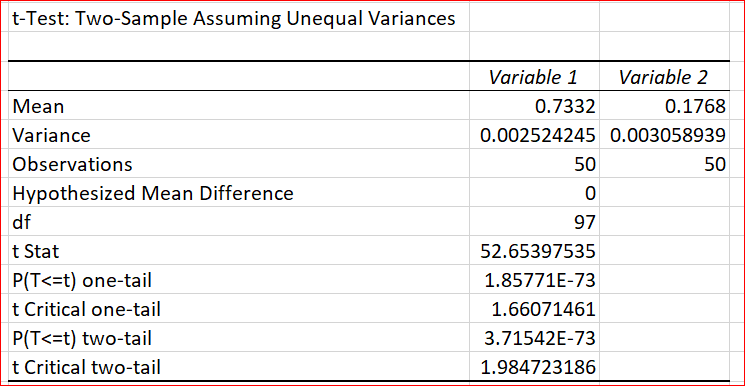

### Conclusion

Based on t-test result we find that p value is very less than our signiicance level and hence we reject our hull hypothesis in favour of alternate hypothesis.ie we can statistically conclude that there is significant difference between survival of men and female passengers.Our observation sample is statistically significant.We can also note here that for both type of t-test one tailed test or two tailed test, p value is very less as compared to sigificance level.

# Pre-processing(left over part and required for model input)

In [242]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [243]:
# converting binary feature 'Sex'.female as 0 and male as 1.
df_train['Sex'] = df_train['Sex'].map({'male' : 1, 'female' : 0 }) 

In [244]:
# Creating a dummy variable for the variable 'Embarked' and dropping the first one.
emb = pd.get_dummies(df_train['Embarked'],prefix='Embarked',drop_first=True)
df_train = pd.concat([df_train,emb],axis =1)

In [245]:
df_train = df_train.drop('Embarked',axis =1)
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,0,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,0,1
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,0,1


In [246]:
df_train['Ticket'].value_counts()

347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: Ticket, Length: 681, dtype: int64

In [247]:
# dropping features 'PassengerId','Name', 'Ticket' as these will not add any value addition in model building
df_train = df_train.drop(['PassengerId','Name','Ticket'],axis =1)

In [248]:
df_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,1
1,1,1,0,38.0,1,0,71.2833,0,0
2,1,3,0,26.0,0,0,7.9250,0,1
3,1,1,0,35.0,1,0,53.1000,0,1
4,0,3,1,35.0,0,0,8.0500,0,1


## Spliting data into train and test set

In [249]:
X = df_train.drop('Survived',axis = 1)

In [250]:
y = df_train['Survived']

In [251]:
df_train.shape,X.shape,y.shape

((891, 9), (891, 8), (891,))

In [252]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [253]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 8), (268, 8), (623,), (268,))

In [254]:
X_train.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
445,1,1,4.000000,0,2,81.8583,0,1
650,3,1,29.699118,0,0,7.8958,0,1
172,3,0,1.000000,1,1,11.1333,0,1
450,2,1,36.000000,1,2,27.7500,0,1
314,2,1,43.000000,1,1,26.2500,0,1


In [255]:
X_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,3,1,29.699118,1,1,15.2458,0,0
439,2,1,31.000000,0,0,10.5000,0,1
840,3,1,20.000000,0,0,7.9250,0,1
720,2,0,6.000000,0,1,33.0000,0,1
39,3,0,14.000000,1,0,11.2417,0,0


In [256]:
y_train.head()

445    1
650    0
172    1
450    0
314    0
Name: Survived, dtype: int64

In [257]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

### Feature scaling

In [258]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train) # scaling X_train and transforming the data

In [259]:
X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)

In [260]:
X_test_scaled = sc.transform(X_test)       # scaling X_test data

In [261]:
X_test_scaled = pd.DataFrame(X_test,columns = X_test.columns)

In [262]:
# Training data after standarization
X_train_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
0,-1.637881,0.720772,-1.946947,-0.474161,1.998853,0.980998,-0.311177,0.602693
1,0.803267,0.720772,0.027243,-0.474161,-0.479327,-0.469634,-0.311177,0.602693
2,0.803267,-1.387401,-2.177405,0.348687,0.759763,-0.406136,-0.311177,0.602693
3,-0.417307,0.720772,0.511273,0.348687,1.998853,-0.080232,-0.311177,0.602693
4,-0.417307,0.720772,1.049008,0.348687,0.759763,-0.109651,-0.311177,0.602693


In [263]:
# Test data after standarization
X_test_scaled.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S
709,3,1,29.699118,1,1,15.2458,0,0
439,2,1,31.000000,0,0,10.5000,0,1
840,3,1,20.000000,0,0,7.9250,0,1
720,2,0,6.000000,0,1,33.0000,0,1
39,3,0,14.000000,1,0,11.2417,0,0


# Model building

## 1. Modelling Logistic regression

In [264]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(X_train_scaled, y_train)

LogisticRegression()

In [265]:
y_train_pred = model1.predict(X_train_scaled)

In [266]:
y_test_pred = model1.predict(X_test_scaled)

In [267]:
#Let's check the overall accuracy
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))


0.7731137909709338
0.5444999139266655


In [268]:
#Logistic regression with cross validation
# define models and parameters
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l1','l2']
c_values = [100, 10, 1.0, 0.1, 0.01]
max_iter = [10,20,50,100]

params = dict(solver = solvers,penalty = penalty, C = c_values,max_iter = max_iter)

cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)
Random_search = RandomizedSearchCV(estimator=model1, param_distributions = params, scoring= 'roc_auc',n_jobs= -1,cv = cv,error_score=0 )
grid_result = Random_search.fit(X_train_scaled, y_train)

In [269]:
grid_result

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
                   error_score=0, estimator=LogisticRegression(), n_jobs=-1,
                   param_distributions={'C': [100, 10, 1.0, 0.1, 0.01],
                                        'max_iter': [10, 20, 50, 100],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                   'liblinear']},
                   scoring='roc_auc')

In [270]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train_scaled)
y_test_pred = best_model.predict(X_test_scaled)
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

0.7769403215831788
0.579990818844322


In [271]:
# RandomSearch results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.837552 using {'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 100, 'C': 0.1}
Best estimator LogisticRegression(C=0.1, solver='newton-cg')


## 2. Modelling Random Forest

In [272]:
model2 = RandomForestClassifier()
model2.fit(X_train_scaled, y_train)

RandomForestClassifier()

In [273]:
y_train_pred = model2.predict(X_train) # scaling not required in random forest as these are based on decision tree
y_test_pred = model2.predict(X_test)
print('Training score :',roc_auc_score(y_train,y_train_pred))
print('Test score :',roc_auc_score(y_test,y_test_pred))

Training score : 0.5
Test score : 0.5


In [274]:
# Random Forest with cross validation
# define models and parameters

estimator = [10,20,50,100]
criteria = ['gini','entropy']
max_depth = [3,5,10,20]

params = dict(n_estimators = estimator ,criterion = criteria, max_depth = max_depth)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=42)

Random_search = RandomizedSearchCV(estimator = model2 , param_distributions= params, n_jobs= -1, cv = cv, scoring= 'roc_auc' ,error_score= 0)

grid_result = Random_search.fit(X_train,y_train)
grid_result


RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
                   error_score=0, estimator=RandomForestClassifier(), n_jobs=-1,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [3, 5, 10, 20],
                                        'n_estimators': [10, 20, 50, 100]},
                   scoring='roc_auc')

In [275]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

0.8259121830550402
0.7977563550811959


In [276]:
# RandomSearch results 
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
print("Best estimator",grid_result.best_estimator_)

Best: 0.856434 using {'n_estimators': 50, 'max_depth': 5, 'criterion': 'gini'}
Best estimator RandomForestClassifier(max_depth=5, n_estimators=50)


## 3. Modelling XGBoost

In [277]:
model3 = XGBClassifier()
model3.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

In [278]:
y_train_pred = model3.predict(X_train) # scaling not required in xgboost as these are based on decision tree
y_test_pred = model3.predict(X_test)
print('Train score : ',roc_auc_score(y_train,y_train_pred))
print('Test score : ',roc_auc_score(y_test,y_test_pred))

Train score :  0.9649814471243042
Test score :  0.7666838813335628


In [279]:
# xgboost with cross validation
# define models and parameters

n_estimators = [2,5,10,20,50,70]
max_depth = [4,6,8,10]
learning_rate = [0.05,0.1,0.2,0.3,0.5]

params = dict(n_estimators = n_estimators, max_depth = max_depth, learning_rate = learning_rate )
cv = RepeatedStratifiedKFold(n_splits=5,n_repeats=3,random_state=42)
Random_search = RandomizedSearchCV(estimator=model3,param_distributions =params,cv = cv,n_jobs=-1,error_score=0,scoring='roc_auc')
grid_result = Random_search.fit(X_train,y_train)
grid_result

RandomizedSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=5, random_state=42),
                   error_score=0,
                   estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           callbacks=None, colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, gamma=0, gpu_id=-1,
                                           grow_policy='depthwise',
                                           importance...
                                           max_delta_step=0, max_depth=6,
                                           max_leaves=0, min_child_weight=1,
                                           missing=nan,
                                         

In [280]:
best_model = Random_search.best_estimator_
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)
print(roc_auc_score(y_train,y_train_pred))
print(roc_auc_score(y_test,y_test_pred))

0.9485544217687074
0.7826074482125438


In [281]:
Random_search.best_params_

{'n_estimators': 70, 'max_depth': 4, 'learning_rate': 0.5}

### On Camparing model performace, xgboost is giving highest test roc-auc of 78.2 %.However, there is still scope for further improvement.

#### Print the FPR,TPR & select the best threshold from the roc curve

In [283]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [285]:
#fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )
fpr, tpr, thresholds = metrics.roc_curve( y_test, y_test_pred, drop_intermediate = False )

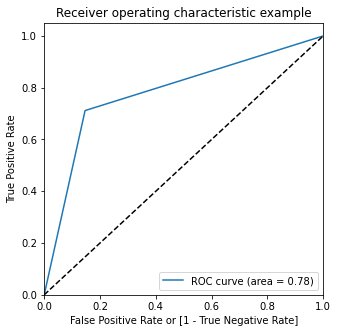

In [286]:
draw_roc(y_test, y_test_pred)